In [1]:
from google.colab import files
uploaded = files.upload()

Saving movie_metadata.csv to movie_metadata.csv


In [2]:
"""
WEEK 3: THE CLEANING SPRINT
Handling missing values and detecting outliers
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Load Data

df = pd.read_csv('movie_metadata.csv')
df_original = df.copy()

print("WEEK 3: CLEANING SPRINT")
print("Original Dataset Shape:", df.shape)

WEEK 3: CLEANING SPRINT
Original Dataset Shape: (5043, 28)



Missing Values Summary:
                         Missing_Count  Missing_Percentage Data_Type
gross                              884               17.53   float64
budget                             492                9.76   float64
aspect_ratio                       329                6.52   float64
content_rating                     303                6.01    object
plot_keywords                      153                3.03    object
title_year                         108                2.14   float64
director_name                      104                2.06    object
director_facebook_likes            104                2.06   float64
num_critic_for_reviews              50                0.99   float64
actor_3_name                        23                0.46    object
actor_3_facebook_likes              23                0.46   float64
num_user_for_reviews                21                0.42   float64
color                               19                0.38    object
duration 

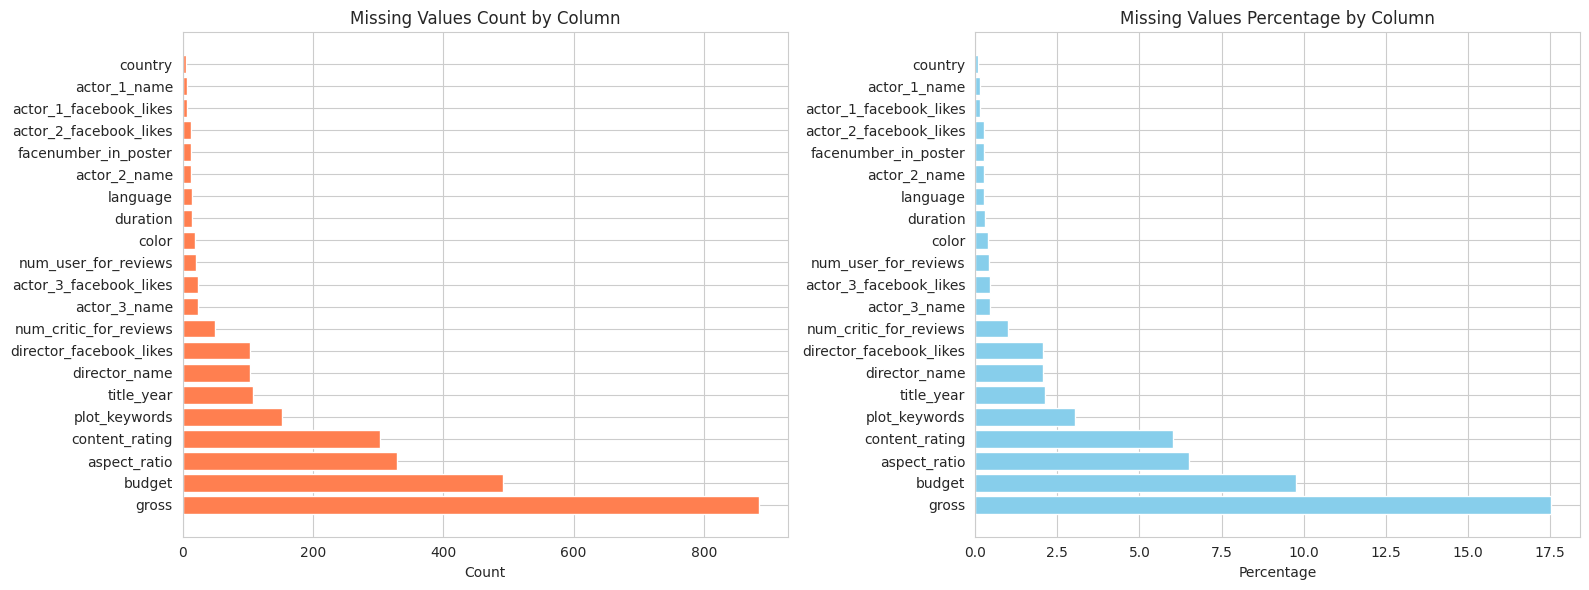

In [3]:
# 2. Missing Values Analysis

missing_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0] \
                    .sort_values('Missing_Percentage', ascending=False)

print("\nMissing Values Summary:")
print(missing_summary)

# Visualization
missing_plot = missing_summary.reset_index()
missing_plot.rename(columns={'index': 'Column'}, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Missing Count
axes[0].barh(missing_plot['Column'],
             missing_plot['Missing_Count'],
             color='coral')
axes[0].set_title('Missing Values Count by Column')
axes[0].set_xlabel('Count')

# Missing Percentage
axes[1].barh(missing_plot['Column'],
             missing_plot['Missing_Percentage'],
             color='skyblue')
axes[1].set_title('Missing Values Percentage by Column')
axes[1].set_xlabel('Percentage')

plt.tight_layout()
plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
# 3. Imputation

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        df[col].fillna(mode_val, inplace=True)

print("\nTotal Missing Values After Imputation:", df.isnull().sum().sum())


Total Missing Values After Imputation: 0


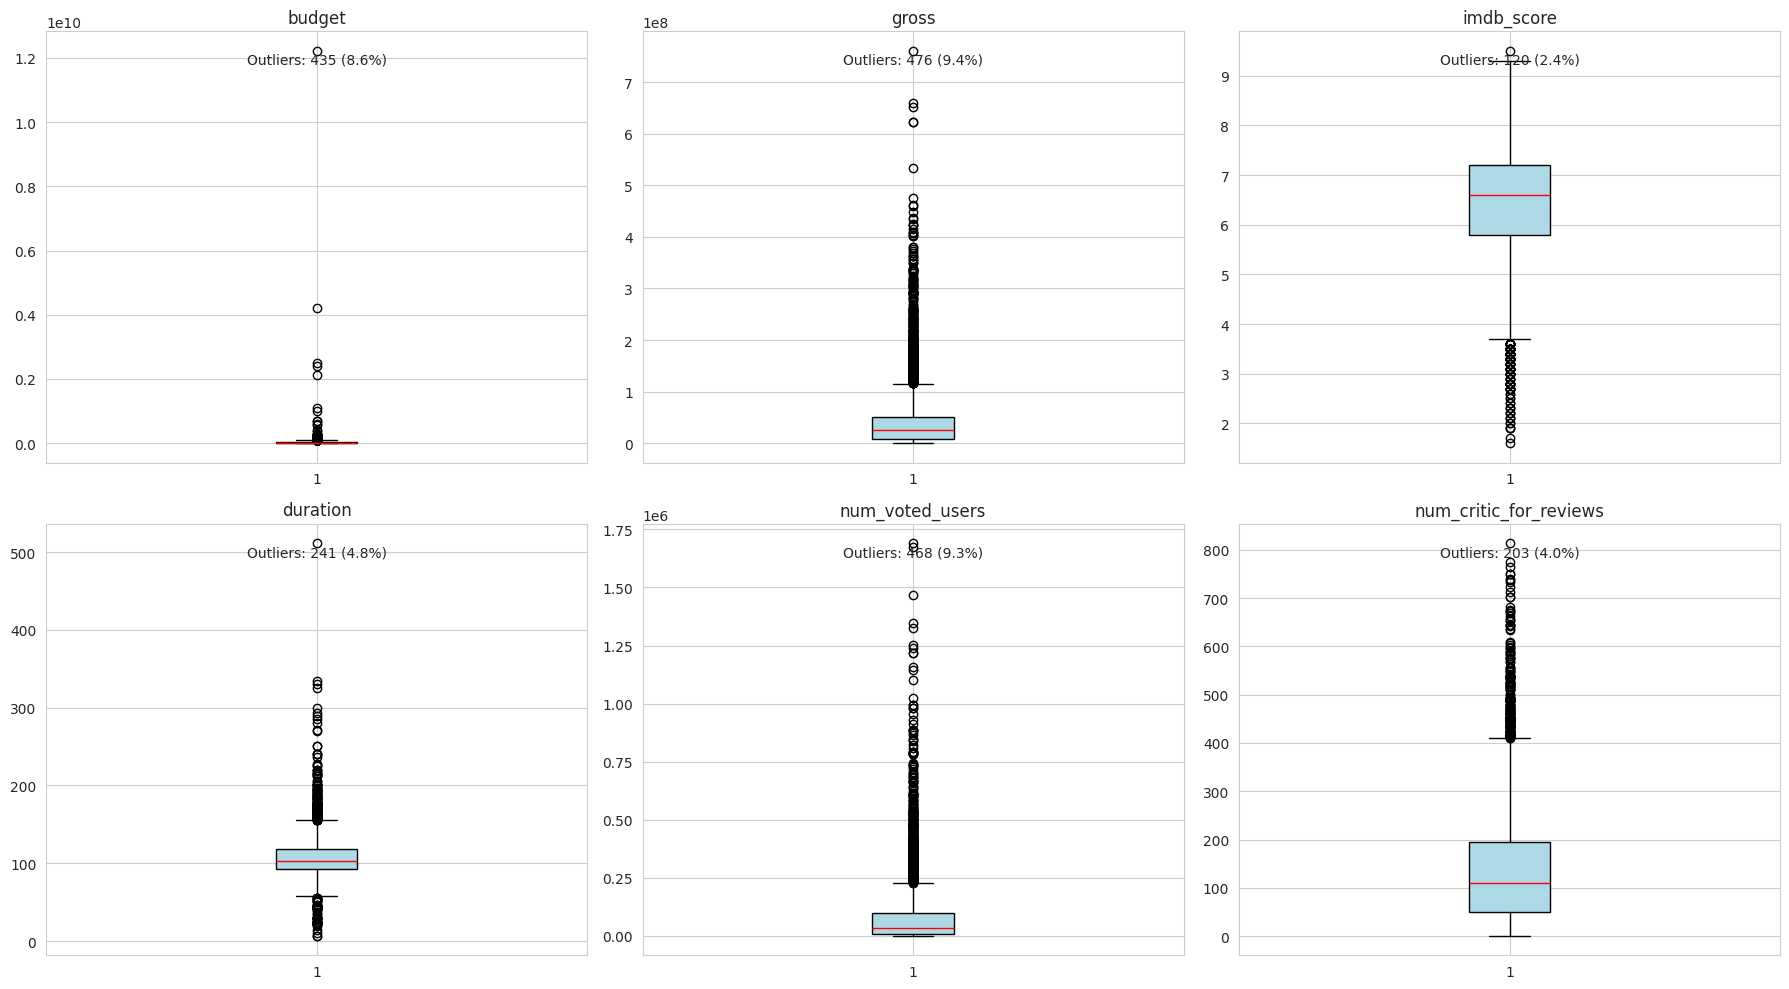

In [5]:
# 4. Outlier Detection - IQR (Boxplots)

outlier_cols = ['budget', 'gross', 'imdb_score',
                'duration', 'num_voted_users',
                'num_critic_for_reviews']

outlier_cols = [col for col in outlier_cols if col in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(outlier_cols):
    data = df[col].dropna()
    axes[idx].boxplot(data, patch_artist=True,
                      boxprops=dict(facecolor='lightblue'),
                      medianprops=dict(color='red'))
    axes[idx].set_title(col)

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data < lower) | (data > upper)]

    axes[idx].text(0.5, 0.95,
                   f'Outliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)',
                   transform=axes[idx].transAxes,
                   ha='center', va='top')

plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()



In [7]:
# 5. Outlier Treatment
# IQR Capping
df_cleaned = df.copy()

for col in outlier_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned[col] = df_cleaned[col].clip(lower, upper)

print("\nFinal Shapes:")
print("After IQR Capping:", df_cleaned.shape)

# Save datasets
df_cleaned.to_csv('movie_metadata_cleaned_capped.csv', index=False)

print("\nCleaned datasets saved successfully.")


Final Shapes:
After IQR Capping: (5043, 28)

Cleaned datasets saved successfully.


In [ ]:
from google.colab import files
files.download("movie_metadata_cleaned_capped.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>